## Reference
https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

In [ ]:
import os
import glob
import pandas as pd
pd.set_option("max_colwidth", None)
import re
import PyPDF2
from tika import parser
import numpy as np
from pathlib import Path

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAMUELJE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAMUELJE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\SAMUELJE\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
docs = glob.glob('NLP_Extraction\\Actual\\*.pdf')
df_doc = pd.DataFrame({'docs_dir': docs})

In [ ]:
df_doc

,docs_dir
0,NLP_Extraction\Actual\A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf
1,NLP_Extraction\Actual\A multi-disciplinary consensus statement concerning surgical approaches to low-grade_ high-grade astrocytomas and diffuse intrinsic pontine gliomas in childhood__.pdf
2,NLP_Extraction\Actual\A population-based study on the effect of temozolomide in the treatment of glioblastoma multiforme.pdf
3,NLP_Extraction\Actual\A review of glioblastoma immunotherapy.pdf
4,NLP_Extraction\Actual\A revised diagnostic classification of canine glioma_ towards validation of the canine glioma patient as a naturally occurring preclinical model for human glioma.pdf
...,...
87,NLP_Extraction\Actual\Therapeutic targets in pilocytic astrocytoma based on genetic analysis.pdf
88,NLP_Extraction\Actual\Thromboembolic disease in patients with high-grade glioma.pdf
89,NLP_Extraction\Actual\Treatment of high-grade glioma in children and adolescents.pdf
90,NLP_Extraction\Actual\Understanding high grade glioma_ molecular mechanism_ therapy and comprehensive management.pdf


************************************************

In [ ]:
#92 different documents
df_doc['docs_dir'].nunique()

92

In [ ]:
TEXT = []
for doc_path in df_doc['docs_dir']:
    raw = parser.from_file(doc_path)
    raw = str(raw)
    #safe_text = raw.encode('utf-8', errors='ignore')
    safe_text = raw.encode('utf-8')
    safe_text = str(safe_text).replace("\n", "").replace("\\", "").replace("nnn", "n ").replace("nn", "n ")
    TEXT.append(safe_text)

df_doc['content'] = TEXT
#df_doc.head(2)

In [ ]:
#getting total word count
df_doc['word_count'] = df_doc['content'].apply(lambda x: len(str(x).split(" ")))
#df_doc.head(2)

In [ ]:
##Descriptive statistics of word counts
df_doc.word_count.describe()

count       92.000000
mean      7538.467391
std       4334.927239
min        737.000000
25%       4881.000000
50%       6573.000000
75%       8578.500000
max      28002.000000
Name: word_count, dtype: float64

In [ ]:
#Identify common words
freq = pd.Series(' '.join(df_doc['content']).split()).value_counts()[:20]
freq

of          19633
the         15510
and         15298
in          13051
n           11569
to           6541
a            6205
with         6193
for          4370
.            4125
et           3850
is           3427
was          2803
patients     2715
by           2578
The          2535
that         2503
as           2354
were         2272
on           2228
dtype: int64

In [ ]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(df_doc['content']).split()).value_counts()[-20:]
freq1

intradural-nextramedullary,                    1
enpnrondnrun                                   1
summary.nActa                                  1
14(16):5166xe2x80x935172.                      1
https://doi.org/10.n1007/s00401-016-1549-xn    1
(specimen                                      1
Software:                                      1
Elmoataz,                                      1
sided,                                         1
thereafter.8,16                                1
131I-radiolabeled                              1
'xmp.iid:F223DAC199B0DF118A82BCAD4743B1A1',    1
ntime,                                         1
L2-3                                           1
developednfeatures                             1
Lixe2x80x93nFraumeni                           1
(E-,                                           1
Gynecology                                     1
(2013)nSafety                                  1
(1.56xe2x80x933.92)                            1
dtype: int64

In [ ]:
parentf =  "C:/"
directory = "nltk_data"
# Path
path = os.path.join(parentf, directory)
#os.mkdir(path)

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [ ]:
#Removal of Stop words
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown", "version", "however", "cerna", "xe", "crossref", "nhttp", "et", "x", "xe", "mir", "dx", "doi", "dx",\
            "saved", "refhub", "elsevier", "com", "doi", "z", "n", "sbref", "indesign", "xc", "xb", "adobe", "gbm", "org", "xmp", "pdf", "nhttps", "rf", "nand", "may", "docinfo", "nthe", "iid", "xa", "http", "re",\
            "sref", "f", "b", "fig", "gfap", "etxa", "al", "xa xa", "sref sref", "saved saved saved", "saved saved", "braf", "e", "c", "j", "h", "r", "www", "nlm", "ncbi", "p", "apache", "parser", "apache parser", \
            "de", "de de"]
stop_words = stop_words.union(new_words)

In [ ]:
corpus = []
for i in range(0, 92):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df_doc['content'][i])

    #Convert to lowercase
    text = text.lower()

    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in
            stop_words]
    text = " ".join(text)
    corpus.append(text)

In [ ]:
#View corpus item
corpus[0][100:2000]

'er tika pdfparser tika content handler totextcontenthandler tika embedded depth tika parse time millis access permission assemble document true access permission modify true access permission print true access permission print degraded true access permission extract content true access permission extract accessibility true access permission fill form true access permission modify otations true created date dc format application application dc language en dc title dcterms created dcterms modified language en meta creation date meta save date modified pdfversion charsperpage created creator tool arbortext advanced print publisher w modified producer acrobat distiller window title encrypted false hasmarkedcontent false hasxfa false hasxmp true unmappedunicodecharsperpage pdfa pdfversion pdfaid conformance pdfaid part producer acrobat distiller window resourcename histopathological diagnostic marker human spinal astrocytoma expression glial fibrillary acidic protein xcexb title creatortoo

In [ ]:
df_doc['keywords'] = corpus

In [ ]:
words = set(nltk.corpus.words.words())
sent = "Io andiamo to the beach with my amico."
" ".join(w for w in nltk.wordpunct_tokenize(sent) \
         if w.lower() in words or not w.isalpha())
print(nltk.wordpunct_tokenize(sent))
# 'Io to the beach with my'

['Io', 'andiamo', 'to', 'the', 'beach', 'with', 'my', 'amico', '.']


In [ ]:
#Only extracting actual english words
words = set(nltk.corpus.words.words())
eng_words = []
for wd in df_doc["keywords"]:
    corpus = wd
    eng_words.append(" ".join(w for w in nltk.wordpunct_tokenize(corpus) \
         if w.lower() in words or not w.isalpha()))

df_doc["english_words"] = eng_words
df_doc.head(1)


docs_dir  \
0  NLP_Extraction\Actual\A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
#df_doc.head(2)

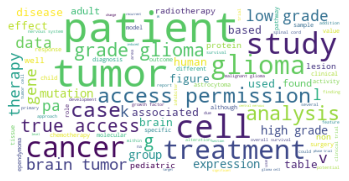

In [ ]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50,
                          random_state=42
                         ).generate(str(eng_words))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(eng_words)

In [ ]:
list(cv.vocabulary_.keys())[:10]

['language',
 'en',
 'title',
 'advanced',
 'publisher',
 'acrobat',
 'distiller',
 'window',
 'conformance',
 'part']

[Text(0, 0, 'tumor'),
 Text(1, 0, 'patient'),
 Text(2, 0, 'cell'),
 Text(3, 0, 'glioma'),
 Text(4, 0, 'grade'),
 Text(5, 0, 'cancer'),
 Text(6, 0, 'brain'),
 Text(7, 0, 'study'),
 Text(8, 0, 'treatment'),
 Text(9, 0, 'survival'),
 Text(10, 0, 'clinical'),
 Text(11, 0, 'analysis'),
 Text(12, 0, 'therapy'),
 Text(13, 0, 'high'),
 Text(14, 0, 'mutation'),
 Text(15, 0, 'gene'),
 Text(16, 0, 'case'),
 Text(17, 0, 'year'),
 Text(18, 0, 'true'),
 Text(19, 0, 'low')]

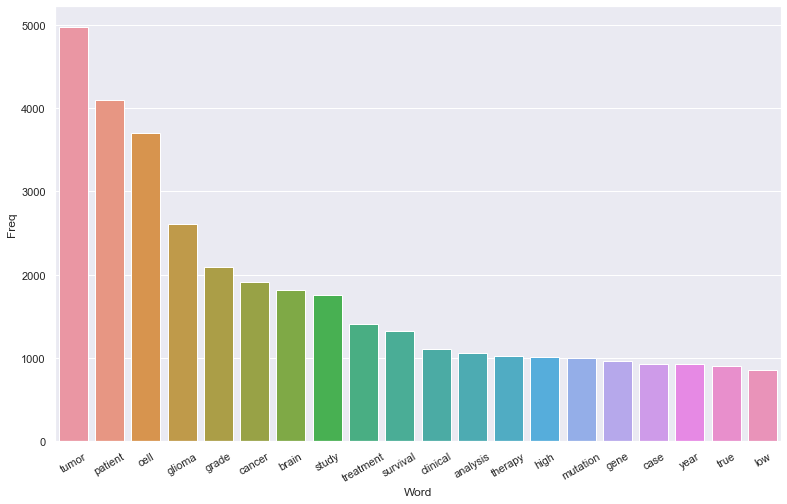

In [ ]:
#Most frequently occuring words
def get_top_n_words(eng_words, n=None):
    vec = CountVectorizer().fit(eng_words)
    bag_of_words = vec.transform(eng_words)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(eng_words, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

              Bi-gram  Freq
0   access permission   736
1        grade glioma   679
2         true access   644
3         brain tumor   626
4           low grade   534
5          high grade   460
6           cancer re   297
7      nervous system   260
8         spinal cord   255
9      clinical trial   244
10   malignant glioma   243
11         tumor cell   234
12      growth factor   228
13   overall survival   223
14        phase trial   217
15    central nervous   214
16        glioma cell   212
17  permission modify   184
18        modify true   184
19   permission print   184


[Text(0, 0, 'access permission'),
 Text(1, 0, 'grade glioma'),
 Text(2, 0, 'true access'),
 Text(3, 0, 'brain tumor'),
 Text(4, 0, 'low grade'),
 Text(5, 0, 'high grade'),
 Text(6, 0, 'cancer re'),
 Text(7, 0, 'nervous system'),
 Text(8, 0, 'spinal cord'),
 Text(9, 0, 'clinical trial'),
 Text(10, 0, 'malignant glioma'),
 Text(11, 0, 'tumor cell'),
 Text(12, 0, 'growth factor'),
 Text(13, 0, 'overall survival'),
 Text(14, 0, 'phase trial'),
 Text(15, 0, 'central nervous'),
 Text(16, 0, 'glioma cell'),
 Text(17, 0, 'permission modify'),
 Text(18, 0, 'modify true'),
 Text(19, 0, 'permission print')]

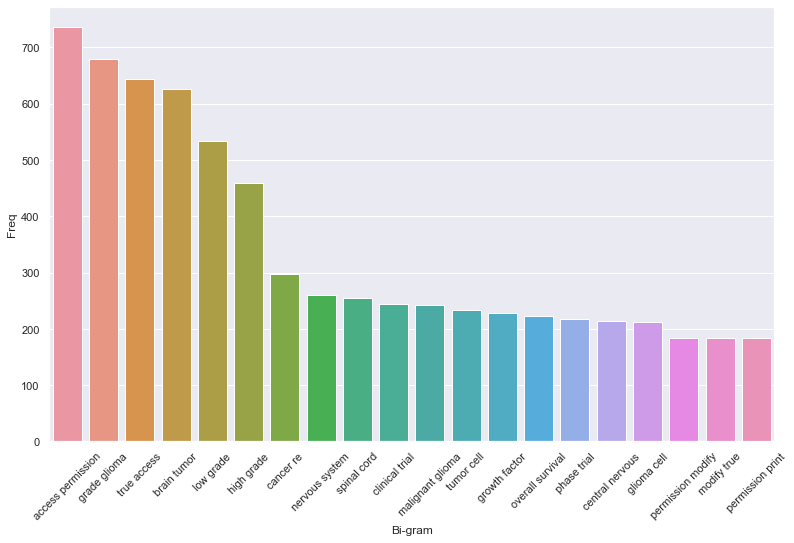

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(eng_words)
    bag_of_words = vec1.transform(eng_words)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]


top2_words = get_top_n2_words(eng_words, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0         true access permission   644
1               low grade glioma   293
2              high grade glioma   249
3         central nervous system   189
4       access permission modify   184
5         permission modify true   184
6        access permission print   184
7      access permission extract   184
8     producer acrobat distiller   102
9       acrobat distiller window    98
10             false false false    96
11      content type application    92
12         content handler depth    92
13           handler depth parse    92
14              depth parse time    92
15             parse time access    92
16        time access permission    92
17    access permission assemble    92
18  permission assemble document    92
19        assemble document true    92


[Text(0, 0, 'true access permission'),
 Text(1, 0, 'low grade glioma'),
 Text(2, 0, 'high grade glioma'),
 Text(3, 0, 'central nervous system'),
 Text(4, 0, 'access permission modify'),
 Text(5, 0, 'permission modify true'),
 Text(6, 0, 'access permission print'),
 Text(7, 0, 'access permission extract'),
 Text(8, 0, 'producer acrobat distiller'),
 Text(9, 0, 'acrobat distiller window'),
 Text(10, 0, 'false false false'),
 Text(11, 0, 'content type application'),
 Text(12, 0, 'content handler depth'),
 Text(13, 0, 'handler depth parse'),
 Text(14, 0, 'depth parse time'),
 Text(15, 0, 'parse time access'),
 Text(16, 0, 'time access permission'),
 Text(17, 0, 'access permission assemble'),
 Text(18, 0, 'permission assemble document'),
 Text(19, 0, 'assemble document true')]

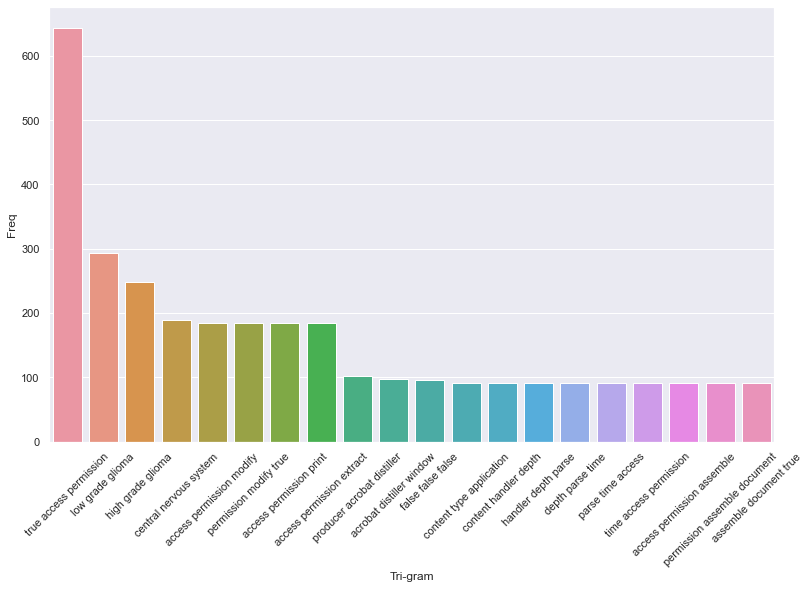

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(eng_words)
    bag_of_words = vec1.transform(eng_words)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(eng_words, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()

# fetch document for which keywords needs to be extracted
doc= eng_words[10]

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""

    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    # word index and corresponding tf-idf score
    for idx, score in sorted_items:

        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]

    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)

# now print the results
print("\nContent:")
#print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Content:

Keywords:
endothelial 0.32
glioma stem 0.293
vessel 0.276
endothelial cell 0.261
stem 0.248
glioma stem cell 0.231
blood vessel 0.214
stem cell 0.207
vascular 0.184
blood 0.155


In [ ]:
#Validating if main words to label gliomas are present

In [ ]:
expert_words = ["Necrosis", "Necrotic Core", "Necrotic", "Enhanced tumor", "Enhancing tumor", "Enhanced glioma", "Enhancing glioma", "Edema"]
def get_word(my_string):
    wd_lst = []
    for word in expert_words:
         if word.lower() in my_string.lower():
            wd_lst.append(word)
    return wd_lst

In [ ]:
df_doc["expert_labels"] = df_doc["keywords"].apply(get_word)

In [ ]:
df_doc["expert_labels"].head()

0                                    []
1                     [Necrotic, Edema]
2                                    []
3    [Necrosis, Enhancing tumor, Edema]
4                  [Necrosis, Necrotic]
Name: expert_labels, dtype: object

In [ ]:
#Extracting top 10 key words from each document

In [ ]:
vector_list = []
for doc in df_doc['english_words']:
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    vector_list.append([k for k in keywords])


df_doc["main_words"] = vector_list


In [ ]:
df_doc.shape

(92, 7)

In [ ]:
#expanding expert labels column
doc_df = df_doc.explode("expert_labels")
doc_df.shape

(132, 7)

In [ ]:
doc_df["expert_labels"].unique()

array([nan, 'Necrotic', 'Edema', 'Necrosis', 'Enhancing tumor',
       'Enhanced tumor', 'Necrotic Core', 'Enhancing glioma'],
      dtype=object)

In [ ]:
#replacing Null values
doc_df['expert_labels'] = doc_df['expert_labels'].fillna('None')

In [ ]:
doc_df["expert_labels"].unique()

array(['None', 'Necrotic', 'Edema', 'Necrosis', 'Enhancing tumor',
       'Enhanced tumor', 'Necrotic Core', 'Enhancing glioma'],
      dtype=object)

In [ ]:
#['yes' if v == 1 else 'no' if v == 2 else 'idle' for v in l]
doc_df["expert_labels"] = ["Necrosis" if i[0:2] == "Ne" else "Enhancing Tumor" if i[0:2] == "En" else "Edema" for i in doc_df["expert_labels"]]
doc_df["expert_labels"].unique()

array(['Edema', 'Necrosis', 'Enhancing Tumor'], dtype=object)

In [ ]:
#expanding main words column
doc_df = doc_df.explode("main_words")
doc_df.shape

(1320, 7)

In [ ]:
doc_df.head()

docs_dir  \
0  NLP_Extraction\Actual\A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   
0  NLP_Extraction\Actual\A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   
0  NLP_Extraction\Actual\A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   
0  NLP_Extraction\Actual\A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   
0  NLP_Extraction\Actual\A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
path = "NLP_Extraction\Actual\A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf"

In [ ]:
p = Path(path)
parts_tuple = p.parts
parts_tuple

('NLP_Extraction',
 'Actual',
 'A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf')

In [ ]:
titles = []
for paths in doc_df["docs_dir"]:
    pth = Path(path)
    path_parts = pth.parts
    titles.append(path_parts[2])
doc_df['title'] = titles

In [ ]:
os.chdir("NLP_Extraction\\Actual\\CSV_Files")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
#combine all files in the list
df_bib = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
df_bib.to_csv( "C:/Brain Tumor Validation/NLP_Extraction/Actual/Paper_Details/combined.csv", index=False, encoding='utf-8-sig')

In [ ]:
"""
bib = []
for docs in df_bib["PDF Name"]:
    print(docs)
    #docs = docs +".pdf"
    bib.append(docs)
df_bib["PDF Name"] = docs"""

'\nbib = []\nfor docs in df_bib["PDF Name"]:\n    print(docs)\n    #docs = docs +".pdf"\n    bib.append(docs)\ndf_bib["PDF Name"] = docs'

In [ ]:
df_bib1 = df_bib[["PDF Name", "Year"]]
df_bib1.columns = ["title", "Year"]
df_bib1.head()

,title,Year
0,Alterations of oxidative phosphorylation complexes in astrocytomas.pdf,2014
1,Alterations of oxidative phosphorylation complexes in astrocytomas.pdf,2014
2,Alterations of oxidative phosphorylation complexes in astrocytomas.pdf,2014
3,Alterations of oxidative phosphorylation complexes in astrocytomas.pdf,2014
4,Alterations of oxidative phosphorylation complexes in astrocytomas.pdf,2014


In [ ]:

doc_df = doc_df.merge(df_bib1.drop_duplicates(), how ="left", on="title")
doc_df.columns

Index(['docs_dir', 'content', 'word_count', 'keywords', 'english_words',
       'expert_labels', 'main_words', 'title', 'Year'],
      dtype='object')

In [ ]:
doc_df.shape

(1320, 9)

In [ ]:
#Reorder columns
doc_df1 = doc_df[['docs_dir', 'title', 'Year', 'content', 'word_count', 'keywords', 'english_words', 'expert_labels', 'main_words']]

In [ ]:
#Select Specific Columns
doc_df = doc_df1[['title', 'Year', 'keywords', 'english_words', 'expert_labels', 'main_words']]

In [ ]:
doc_df.head()

title  \
0  A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   
1  A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   
2  A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   
3  A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   
4  A histopathological diagnostic marker for human spinal astrocytoma_ expression of glial fibrillary acidic protein-δ.pdf   

   Year  \
0  2012   
1  2012   
2  2012   
3  2012   
4  2012   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
doc_df.to_csv("C:/Brain Tumor Validation/NLP_Extraction/Actual/Paper_Details/glioma_keywords.csv")
